 House Price Prediction with Custom Linear Regression

 Loading and preprocessing data...
Dataset loaded successfully!
Training data shape: (1460, 81)
Testing data shape: (1459, 80)

 Training Linear Regression model...

 Making predictions...

 Model Performance:
R² Score: 0.5797
RMSE: $51,486.06
MAE: $35,653.84

 Model Parameters:
Bias (Intercept): 180921.20
Weights:
  Square Footage: 56135.8360
  Bedrooms: -22700.4772
  Bathrooms: 16844.9958

 Creating visualizations...


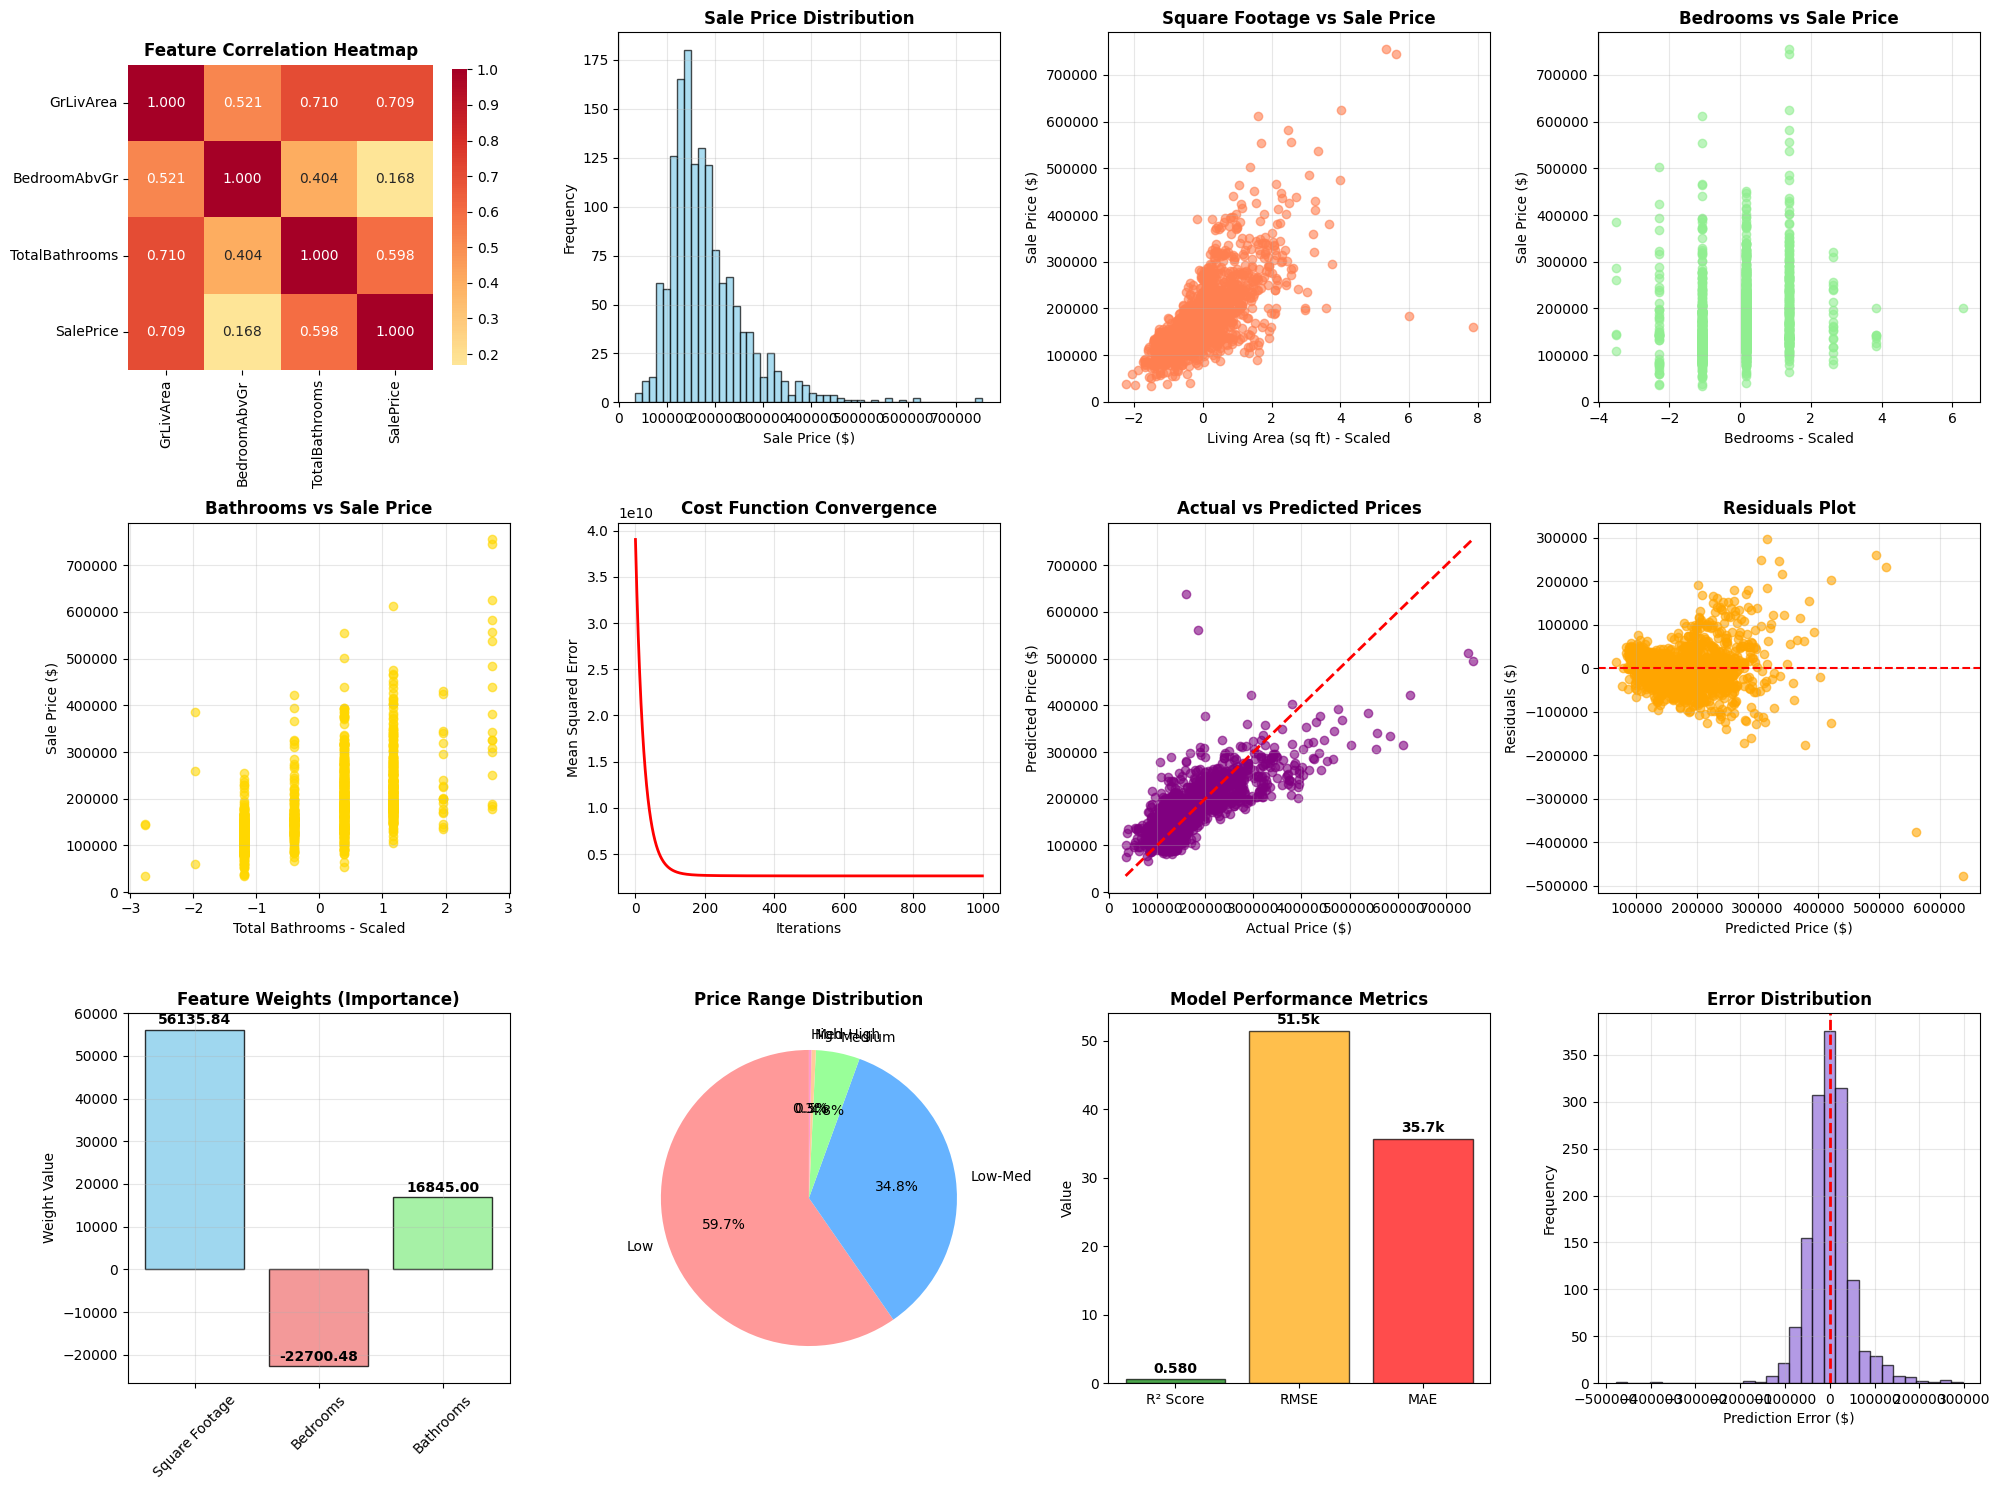


 Saving results to CSV...

Test Predictions:
  Id  Square_Footage  Bedrooms  Bathrooms  Predicted_Price
1461             896         2        1.0    118819.296212
1462            1329         3        1.5    150491.489839
1463            1629         3        2.5    209024.988148
1464            1604         3        2.5    206354.296827
1465            1280         2        2.0    186326.317358
1466            1655         3        2.5    211802.507121
1467            1187         3        2.0    148564.564371
1468            1465         3        2.5    191505.253086
1469            1341         2        1.5    179600.202947
1470             882         2        1.0    117323.709072

Analysis complete!
Files saved:
   - training_results_with_predictions.csv
   - test_predictions.csv
   - model_summary_statistics.csv
   - house_price_analysis.png


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

class LinearRegression:
    """Custom Linear Regression implementation from scratch"""

    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        """Train the linear regression model using gradient descent"""
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for i in range(self.max_iterations):
            # Forward pass
            y_pred = self.predict(X)

            # Calculate cost (Mean Squared Error)
            cost = np.mean((y - y_pred) ** 2)
            self.cost_history.append(cost)

            # Calculate gradients
            dw = -(2/n_samples) * np.dot(X.T, (y - y_pred))
            db = -(2/n_samples) * np.sum(y - y_pred)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Check for convergence
            if i > 0 and abs(self.cost_history[-2] - self.cost_history[-1]) < self.tolerance:
                print(f"Converged after {i+1} iterations")
                break

    def predict(self, X):
        """Make predictions using the trained model"""
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        """Calculate R-squared score"""
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

def load_and_preprocess_data(train_path, test_path):
    """Load and preprocess the training and testing data"""
    # Load datasets
    train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
    test_data = pd.read_csv('/content/drive/MyDrive/test.csv')

    print("Dataset loaded successfully!")
    print(f"Training data shape: {train_data.shape}")
    print(f"Testing data shape: {test_data.shape}")

    # Select features based on the requirements
    # Square footage: GrLivArea (Above grade living area square feet)
    # Bedrooms: BedroomAbvGr (Bedrooms above grade)
    # Bathrooms: FullBath + HalfBath*0.5 (Total bathrooms)

    feature_columns = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']
    target_column = 'SalePrice'

    # Check if required columns exist
    missing_cols_train = [col for col in feature_columns if col not in train_data.columns]
    missing_cols_test = [col for col in feature_columns if col not in test_data.columns]

    if missing_cols_train:
        print(f"Warning: Missing columns in training data: {missing_cols_train}")
    if missing_cols_test:
        print(f"Warning: Missing columns in testing data: {missing_cols_test}")

    # Create bathroom feature (Full baths + Half baths * 0.5)
    train_data['TotalBathrooms'] = train_data['FullBath'] + train_data['HalfBath'] * 0.5
    test_data['TotalBathrooms'] = test_data['FullBath'] + test_data['HalfBath'] * 0.5

    # Final feature set
    features = ['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']

    # Extract features and target
    X_train = train_data[features].copy()
    y_train = train_data[target_column].copy()
    X_test = test_data[features].copy()

    # Handle missing values
    X_train = X_train.fillna(X_train.median())
    X_test = X_test.fillna(X_train.median())  # Use training median for test data

    # Feature scaling (standardization)
    X_train_scaled = (X_train - X_train.mean()) / X_train.std()
    X_test_scaled = (X_test - X_train.mean()) / X_train.std()  # Use training stats

    return X_train_scaled, y_train, X_test_scaled, X_train, X_test, train_data, test_data

def create_visualizations(X_train, y_train, model, train_data):
    """Create comprehensive visualizations"""
    plt.style.use('default')
    fig = plt.figure(figsize=(20, 15))

    # 1. Correlation Heatmap
    plt.subplot(3, 4, 1)
    # Create correlation matrix with relevant features
    viz_features = ['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms', 'SalePrice']
    train_viz = train_data[viz_features].copy()
    train_viz['TotalBathrooms'] = train_data['FullBath'] + train_data['HalfBath'] * 0.5

    corr_matrix = train_viz.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0,
                square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
    plt.title('Feature Correlation Heatmap', fontsize=12, fontweight='bold')

    # 2. Sale Price Distribution
    plt.subplot(3, 4, 2)
    plt.hist(y_train, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Sale Price Distribution', fontsize=12, fontweight='bold')
    plt.xlabel('Sale Price ($)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

    # 3. Square Footage vs Price
    plt.subplot(3, 4, 3)
    plt.scatter(X_train.iloc[:, 0], y_train, alpha=0.6, color='coral')
    plt.title('Square Footage vs Sale Price', fontsize=12, fontweight='bold')
    plt.xlabel('Living Area (sq ft) - Scaled')
    plt.ylabel('Sale Price ($)')
    plt.grid(True, alpha=0.3)

    # 4. Bedrooms vs Price
    plt.subplot(3, 4, 4)
    plt.scatter(X_train.iloc[:, 1], y_train, alpha=0.6, color='lightgreen')
    plt.title('Bedrooms vs Sale Price', fontsize=12, fontweight='bold')
    plt.xlabel('Bedrooms - Scaled')
    plt.ylabel('Sale Price ($)')
    plt.grid(True, alpha=0.3)

    # 5. Bathrooms vs Price
    plt.subplot(3, 4, 5)
    plt.scatter(X_train.iloc[:, 2], y_train, alpha=0.6, color='gold')
    plt.title('Bathrooms vs Sale Price', fontsize=12, fontweight='bold')
    plt.xlabel('Total Bathrooms - Scaled')
    plt.ylabel('Sale Price ($)')
    plt.grid(True, alpha=0.3)

    # 6. Cost Function Convergence
    plt.subplot(3, 4, 6)
    plt.plot(model.cost_history, color='red', linewidth=2)
    plt.title('Cost Function Convergence', fontsize=12, fontweight='bold')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.grid(True, alpha=0.3)

    # 7. Actual vs Predicted
    y_pred_train = model.predict(X_train)
    plt.subplot(3, 4, 7)
    plt.scatter(y_train, y_pred_train, alpha=0.6, color='purple')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    plt.title('Actual vs Predicted Prices', fontsize=12, fontweight='bold')
    plt.xlabel('Actual Price ($)')
    plt.ylabel('Predicted Price ($)')
    plt.grid(True, alpha=0.3)

    # 8. Residuals Plot
    plt.subplot(3, 4, 8)
    residuals = y_train - y_pred_train
    plt.scatter(y_pred_train, residuals, alpha=0.6, color='orange')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals Plot', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted Price ($)')
    plt.ylabel('Residuals ($)')
    plt.grid(True, alpha=0.3)

    # 9. Feature Importance (Weights)
    plt.subplot(3, 4, 9)
    features = ['Square Footage', 'Bedrooms', 'Bathrooms']
    weights = model.weights
    colors = ['skyblue', 'lightcoral', 'lightgreen']
    bars = plt.bar(features, weights, color=colors, alpha=0.8, edgecolor='black')
    plt.title('Feature Weights (Importance)', fontsize=12, fontweight='bold')
    plt.ylabel('Weight Value')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Add value labels on bars
    for bar, weight in zip(bars, weights):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (max(weights) * 0.01),
                f'{weight:.2f}', ha='center', va='bottom', fontweight='bold')

    # 10. Price Range Distribution
    plt.subplot(3, 4, 10)
    price_ranges = pd.cut(y_train, bins=5, labels=['Low', 'Low-Med', 'Medium', 'Med-High', 'High'])
    price_counts = price_ranges.value_counts()
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
    plt.pie(price_counts.values, labels=price_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
    plt.title('Price Range Distribution', fontsize=12, fontweight='bold')

    # 11. Model Performance Metrics
    plt.subplot(3, 4, 11)
    r2_score = model.score(X_train, y_train)
    rmse = np.sqrt(np.mean((y_train - y_pred_train) ** 2))
    mae = np.mean(np.abs(y_train - y_pred_train))

    metrics = ['R² Score', 'RMSE', 'MAE']
    values = [r2_score, rmse/1000, mae/1000]  # Scale RMSE and MAE to thousands
    colors = ['green', 'orange', 'red']

    bars = plt.bar(metrics, values, color=colors, alpha=0.7, edgecolor='black')
    plt.title('Model Performance Metrics', fontsize=12, fontweight='bold')
    plt.ylabel('Value')

    # Add value labels
    for bar, value, metric in zip(bars, values, metrics):
        if metric == 'R² Score':
            label = f'{value:.3f}'
        else:
            label = f'{value:.1f}k'
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (max(values) * 0.01),
                label, ha='center', va='bottom', fontweight='bold')

    # 12. Error Distribution
    plt.subplot(3, 4, 12)
    plt.hist(residuals, bins=30, alpha=0.7, color='mediumpurple', edgecolor='black')
    plt.title('Error Distribution', fontsize=12, fontweight='bold')
    plt.xlabel('Prediction Error ($)')
    plt.ylabel('Frequency')
    plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('house_price_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

def main():
    """Main function to run the house price prediction pipeline"""
    print(" House Price Prediction with Custom Linear Regression")
    print("=" * 60)

    # File paths (update these with your actual file paths)
    train_path = 'train.csv'  # Update with your training data path
    test_path = 'test.csv'    # Update with your testing data path

    try:
        # Load and preprocess data
        print("\n Loading and preprocessing data...")
        X_train_scaled, y_train, X_test_scaled, X_train_orig, X_test_orig, train_data, test_data = load_and_preprocess_data(train_path, test_path)

        # Initialize and train the model
        print("\n Training Linear Regression model...")
        model = LinearRegression(learning_rate=0.01, max_iterations=1000, tolerance=1e-6)
        model.fit(X_train_scaled.values, y_train.values)

        # Make predictions
        print("\n Making predictions...")
        train_predictions = model.predict(X_train_scaled.values)
        test_predictions = model.predict(X_test_scaled.values)

        # Calculate performance metrics
        r2_score = model.score(X_train_scaled.values, y_train.values)
        rmse = np.sqrt(np.mean((y_train.values - train_predictions) ** 2))
        mae = np.mean(np.abs(y_train.values - train_predictions))

        print(f"\n Model Performance:")
        print(f"R² Score: {r2_score:.4f}")
        print(f"RMSE: ${rmse:,.2f}")
        print(f"MAE: ${mae:,.2f}")

        # Display model parameters
        print(f"\n Model Parameters:")
        print(f"Bias (Intercept): {model.bias:.2f}")
        print(f"Weights:")
        features = ['Square Footage', 'Bedrooms', 'Bathrooms']
        for feature, weight in zip(features, model.weights):
            print(f"  {feature}: {weight:.4f}")

        # Create visualizations
        print("\n Creating visualizations...")
        create_visualizations(X_train_scaled, y_train, model, train_data)

        # Prepare results for CSV
        print("\n Saving results to CSV...")

        # Training results
        train_results = pd.DataFrame({
            'Id': train_data.index if 'Id' not in train_data.columns else train_data['Id'],
            'Square_Footage': X_train_orig['GrLivArea'],
            'Bedrooms': X_train_orig['BedroomAbvGr'],
            'Bathrooms': X_train_orig['TotalBathrooms'],
            'Actual_Price': y_train.values,
            'Predicted_Price': train_predictions,
            'Prediction_Error': y_train.values - train_predictions,
            'Absolute_Error': np.abs(y_train.values - train_predictions)
        })

        # Test results
        test_results = pd.DataFrame({
            'Id': test_data.index if 'Id' not in test_data.columns else test_data['Id'],
            'Square_Footage': X_test_orig['GrLivArea'],
            'Bedrooms': X_test_orig['BedroomAbvGr'],
            'Bathrooms': X_test_orig['TotalBathrooms'],
            'Predicted_Price': test_predictions
        })

        # Save to CSV files
        train_results.to_csv('training_results_with_predictions.csv', index=False)
        test_results.to_csv('test_predictions.csv', index=False)

        # Create summary statistics
        summary_stats = pd.DataFrame({
            'Metric': ['R² Score', 'RMSE', 'MAE', 'Mean Actual Price', 'Mean Predicted Price',
                      'Min Prediction', 'Max Prediction', 'Std Prediction'],
            'Value': [r2_score, rmse, mae, np.mean(y_train), np.mean(train_predictions),
                     np.min(test_predictions), np.max(test_predictions), np.std(test_predictions)]
        })
        summary_stats.to_csv('model_summary_statistics.csv', index=False)

        # Display sample predictions
        print(f"\nTest Predictions:")
        print(test_results.head(10).to_string(index=False))

        print(f"\nAnalysis complete!")
        print(f"Files saved:")
        print(f"   - training_results_with_predictions.csv")
        print(f"   - test_predictions.csv")
        print(f"   - model_summary_statistics.csv")
        print(f"   - house_price_analysis.png")

        return model, train_results, test_results, summary_stats

    except FileNotFoundError as e:
        print(f"Error: Could not find the data files.")
        print(f"Please make sure 'train.csv' and 'test.csv' are in the current directory.")
        print(f"Error details: {e}")
        return None, None, None, None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None, None

if __name__ == "__main__":
    model, train_results, test_results, summary_stats = main()